In [1]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


In [5]:
def addWhiteNoise(image):
    # Set the range for a random probablity
    # A large prob will mean more noise
    prob = random.uniform(0.25, 0.5)

    # Generate a random matrix in the shape of our input image
    rnd = np.random.rand(image.shape[0], image.shape[1])

    # If the random values in our rnd matrix are less than our random probability
    # We randomly change that pixel in our input image to a value within the range specified
    image[rnd < prob] = np.random.randint(50,230)
    return image

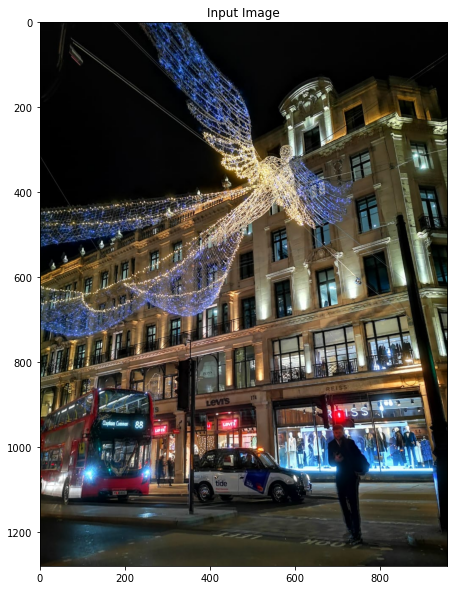

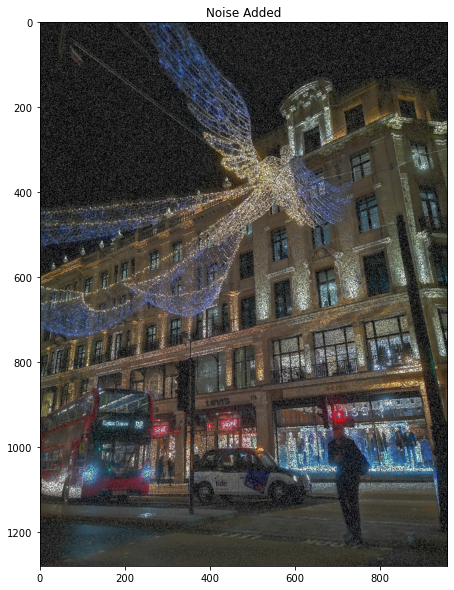

In [6]:
image = cv2.imread('../images/images/londonxmas.jpeg')
imshow("Input Image", image)

# Apply our white noise function to our input image 
noise_1 = addWhiteNoise(image)
imshow("Noise Added", noise_1)

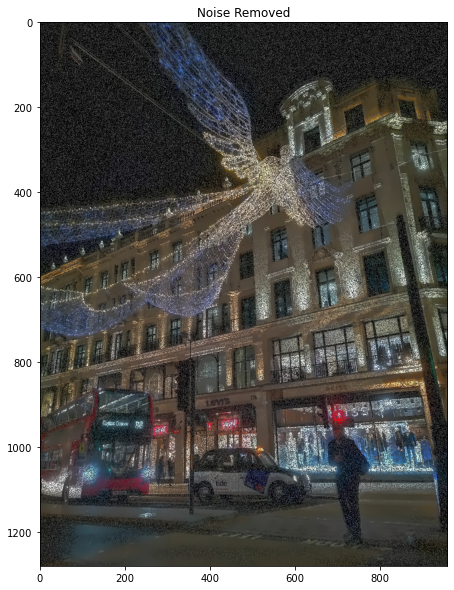

In [30]:
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)

imshow("Noise Removed", dst)

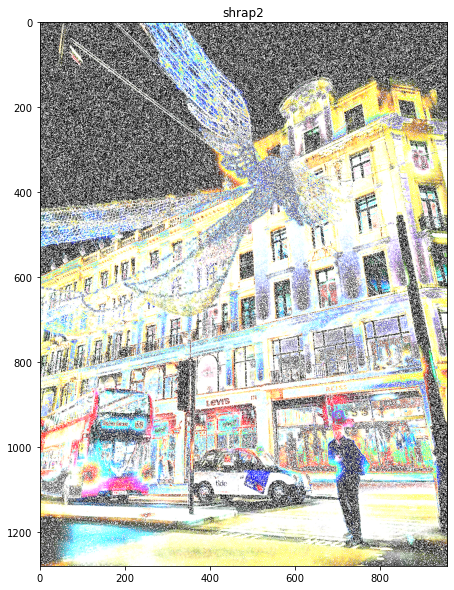

In [22]:
kernel_sharp = np.array([
    [-1,-1,-1],
    [-1,15,-1],
    [-1,-1,-1]
])
sharp1 = cv2.filter2D(noise_1,-1,kernel_sharp)
imshow('shrap2',sharp1)

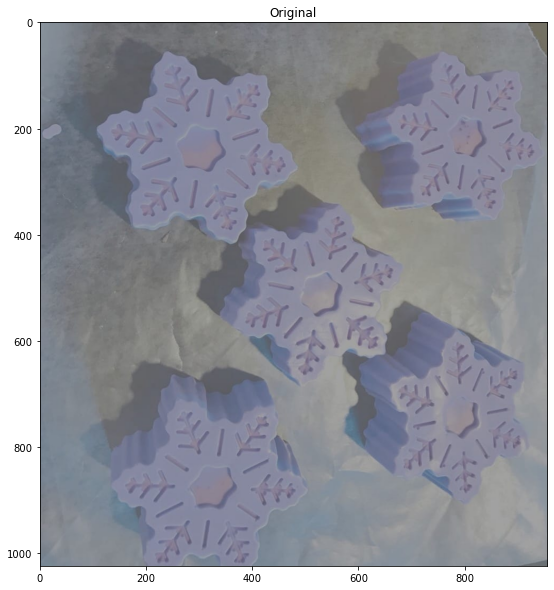

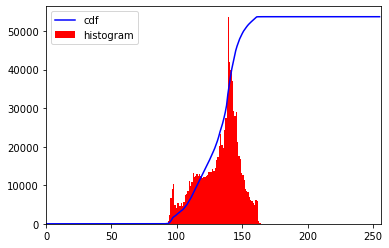

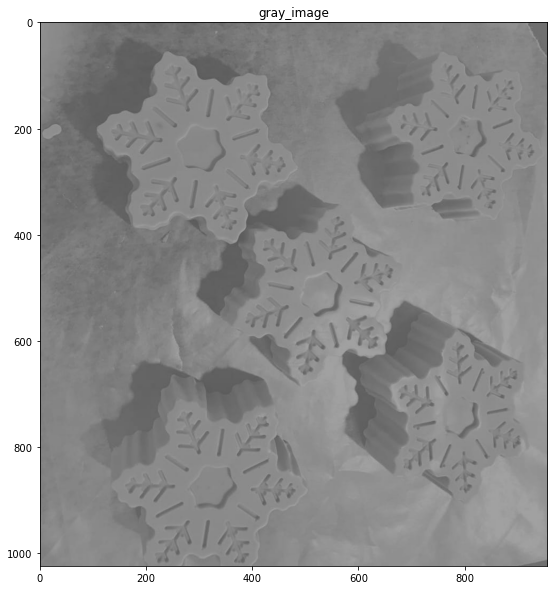

In [31]:
img = cv2.imread('../images/images/soaps.jpeg')
imshow("Original", img)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create our histogram distribution
hist,bins = np.histogram(gray_image.flatten(),256,[0,256])

# Get the Cumulative Sum 
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
imshow("gray_image", gray_image)

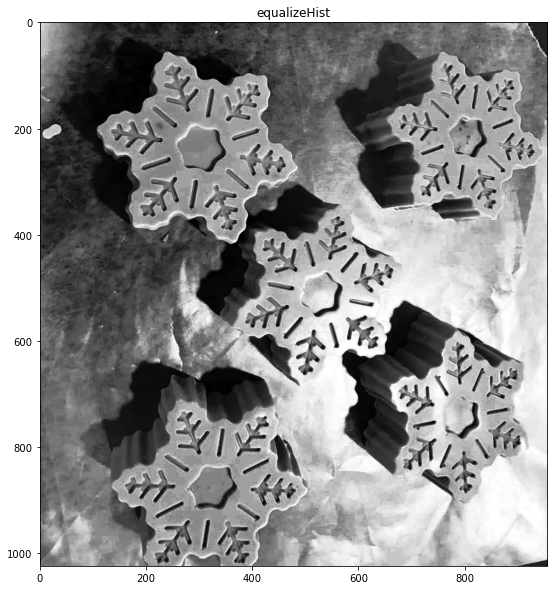

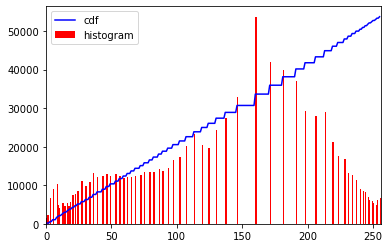

In [33]:
img = cv2.imread('../images/images/soaps.jpeg')

# Convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Equalize our Histogram
gray_image = cv2.equalizeHist(gray_image)
imshow("equalizeHist", gray_image)

# Create our histogram distribution
hist,bins = np.histogram(gray_image.flatten(),256,[0,256])

# Get the Cumulative Sum 
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

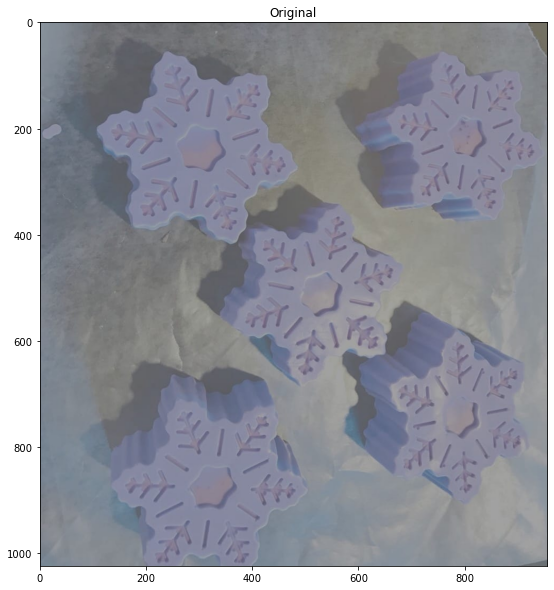

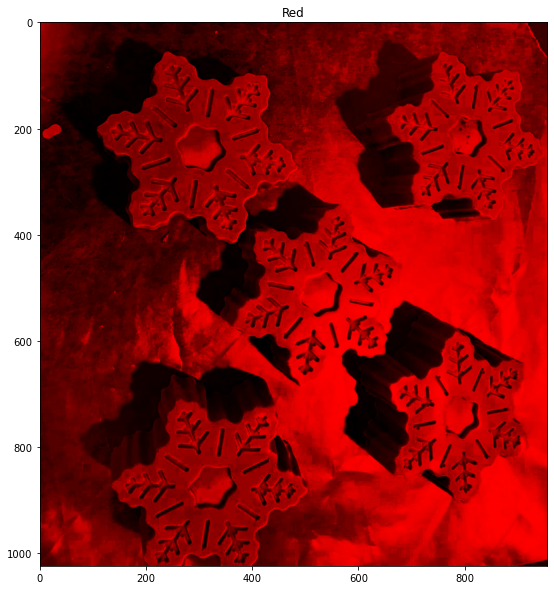

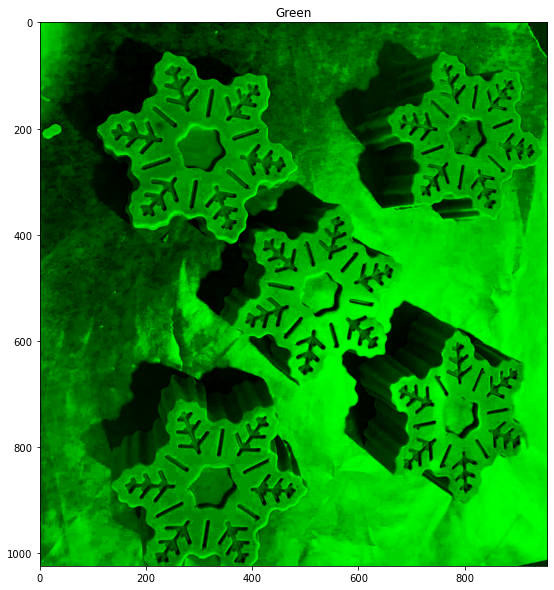

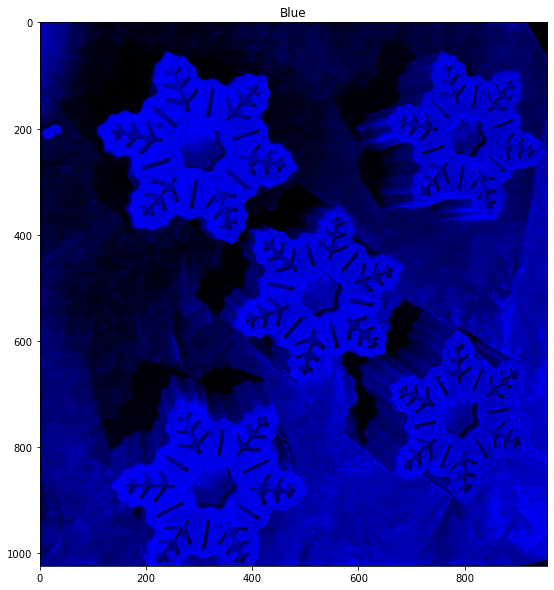

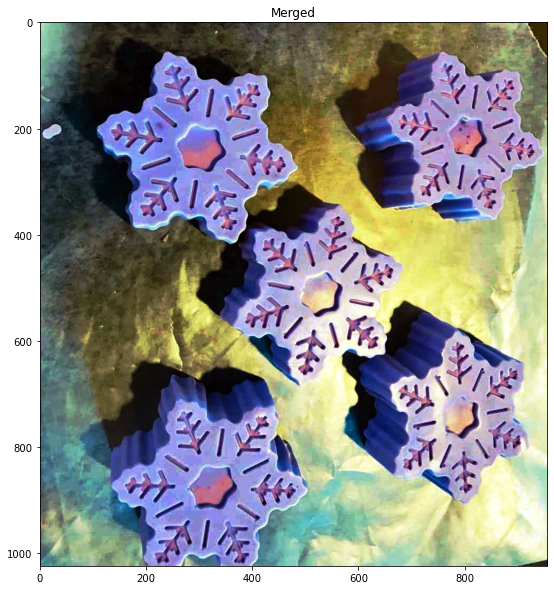

In [37]:
import cv2 
 
img = cv2.imread('../images/images/soaps.jpeg')
 
imshow("Original", img)
 
# Equalize our Histogram
# Default color format is BGR 
 
red_channel = img[:, :, 2]
red = cv2.equalizeHist(red_channel)
 
green_channel = img[:, :, 1]
green = cv2.equalizeHist(green_channel)
 
blue_channel = img[:, :, 0]
blue = cv2.equalizeHist(blue_channel)
 
# create empty image with same shape as that of src image
red_img = np.zeros(img.shape)
red_img[:,:,2] = red
red_img = np.array(red_img, dtype=np.uint8)
imshow("Red", red_img)
 
green_img = np.zeros(img.shape)
green_img[:,:,1] = green
green_img = np.array(green_img, dtype=np.uint8)
imshow("Green", green_img)
 
blue_img = np.zeros(img.shape)
blue_img[:,:,0] = blue
blue_img = np.array(blue_img, dtype=np.uint8)
imshow("Blue", blue_img)
 
merged = cv2.merge([blue, green, red])
imshow("Merged", merged)